In [5]:
#data processing and visualization
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
 

#tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError


#scikit-learn
!pip install sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import export_graphviz 
from sklearn.preprocessing import LabelEncoder

#regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as XGBRegressor
import xgboost as xg
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn import neighbors

# models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR



#evaluation matrices
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error, r2_score
import math
from math import sqrt
from sklearn.metrics import log_loss , accuracy_score
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error


import warnings
warnings.simplefilter('ignore')

In [6]:
import os
import zipfile
import numpy as np
from pathlib import Path
from xml.dom.minidom import parse
from shutil import copyfile

In [7]:
train = pd.read_csv('../input/layerai-air-quality-prediction-challenge/train (13).csv')

In [8]:
test = pd.read_csv('../input/layerai-air-quality-prediction-challenge/test (14).csv')

In [9]:
submission = pd.read_csv('../input/layerai-air-quality-prediction-challenge/SampleSubmission (8).csv')

In [10]:
submission

,ID,pm2_5
0,ID_UOH62J0XHX,0
1,ID_4OPWSB0UHJ,0
2,ID_3SLMNNG1Z3,0
3,ID_MFUHTXYPM4,0
4,ID_TY1DAND8ZP,0
...,...,...
4249,ID_NYKGOYFBKZ,0
4250,ID_IWO4EVLHSQ,0
4251,ID_G1M1IMY9WU,0
4252,ID_DXV65Q1QXI,0


In [11]:
#create_report(test).show()

In [12]:
train.device.unique()

array(['ANQ16PZJ', 'AB6051M4', 'A0WN66FH', 'aq_41', 'aq_54', 'AY2J2Q7Z',
       'AR2RHV97', 'aq_64', 'A95X5F9T', 'AW66FF7V', 'APZ80RTM', 'aq_31',
       'aq_59', 'aq_30', 'aq_76', 'aq_29', 'aq_70', 'APYZC5J7', 'aq_56',
       'AJCK5L86', 'aq_46', 'aq_61', 'aq_49', 'AKSLS0FP', 'aq_74',
       'aq_35', 'aq_43', 'aq_52', 'aq_60', 'aq_36', 'aq_45', 'aq_57',
       'aq_47', 'aq_79'], dtype=object)

In [16]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
train['device']= label_encoder.fit_transform(train['device']) 
train

,ID,date,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5
0,ID_JBYXJEUZ8X,2020-03-18,5,0.353465,32.560322,0.846844,22.038542,-0.000138,1.042629,-0.000143,...,4181.792969,69589.453125,3181.793457,7.799846,0.278111,76.618553,9.970293,-93.110069,19.214193,63.853333
1,ID_PEJJNLBUPR,2019-10-13,2,0.390741,32.582257,0.874493,21.545833,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.507083
2,ID_21L8UZQO1T,2019-12-21,0,0.285751,32.578325,0.729340,23.568655,NaN,NaN,NaN,...,4440.391113,67341.109375,3440.390869,62.496590,0.416631,-97.300758,63.690605,-127.856804,40.857922,80.290833
3,ID_GNW2G8J4T8,2020-02-20,16,-1.244985,29.989236,0.919271,16.338542,-0.000111,0.750228,-0.000083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.601687
4,ID_4XOX2V6SK0,2019-04-17,16,-1.244985,29.989236,0.858365,16.602083,-0.000127,0.792634,-0.000101,...,4842.057488,64347.788635,3842.057585,4.971117,0.277157,74.786025,32.583070,-57.273638,21.864529,89.642229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9918,ID_E2O117AYG3,2020-07-20,7,0.306666,32.608550,0.736872,22.965972,NaN,NaN,NaN,...,7156.016834,48356.941077,6156.016834,3.419584,0.235853,72.847686,50.858546,-31.908548,24.023105,69.690417
9919,ID_8CJG37XAYN,2020-02-23,27,0.307780,32.651449,0.721721,26.555392,-0.000684,0.414260,-0.000283,...,13266.058594,20344.134766,12266.058594,10.198909,0.284046,-97.272919,64.089607,-109.482361,32.003708,47.470518
9920,ID_NTRI2J528O,2020-04-17,3,0.343898,32.587226,0.810413,22.915625,NaN,NaN,NaN,...,7754.737305,44284.785156,6754.737305,5.724823,0.299491,-98.203743,53.532288,-70.173080,32.261959,43.237917
9921,ID_IBH41YUMOZ,2020-06-08,32,0.357987,32.584100,0.876437,21.258333,NaN,NaN,NaN,...,6357.190430,53044.425781,5357.190430,49.711514,0.279414,71.634727,61.877548,-26.566027,25.409733,25.599925


In [18]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
# test['device']= label_encoder.fit_transform(test['device']) 
test['device']= label_encoder.fit_transform(test['device']) 
test

,ID,date,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_UOH62J0XHX,2020-10-02,17,0.289040,32.589580,0.756840,23.849653,0.000124,0.839054,0.000104,...,36716.141728,8325.718024,41969.524699,7325.718482,2.632129,0.210430,74.431975,35.449770,-101.546713,21.006060
1,ID_4OPWSB0UHJ,2020-12-07,23,0.356400,32.573000,0.810854,22.075347,NaN,NaN,NaN,...,63086.023438,4060.879639,70871.984375,3060.879639,2.773685,0.344436,-97.300392,63.489811,-125.937134,41.709042
2,ID_3SLMNNG1Z3,2020-11-16,26,0.381576,32.647109,0.883253,20.050694,NaN,NaN,NaN,...,46783.820820,6456.160528,53084.224103,5456.160528,3.862119,0.326882,-97.699519,58.824120,-120.683819,40.183680
3,ID_MFUHTXYPM4,2020-09-05,9,0.379562,32.553714,0.782583,22.248958,0.000176,0.730853,0.000129,...,45528.261719,6682.570801,51503.203125,5682.570801,1.937542,0.212181,75.361595,24.835907,-72.224319,20.675266
4,ID_TY1DAND8ZP,2020-12-15,18,0.344000,32.553000,0.770116,22.565217,NaN,NaN,NaN,...,65512.797785,3757.637022,73461.827324,2757.637022,3.733908,0.262021,76.537080,11.026513,-139.072620,32.046360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,ID_NYKGOYFBKZ,2020-08-25,32,0.357987,32.584100,0.786575,23.790833,NaN,NaN,NaN,...,52109.843750,5625.392090,59100.105469,4625.392090,11.611624,0.235978,76.397339,12.520192,-62.776257,22.760517
4250,ID_IWO4EVLHSQ,2020-08-21,2,0.390741,32.582257,0.828441,21.801389,NaN,NaN,NaN,...,29895.648437,9842.744141,34098.406250,8842.744141,7.293560,0.285149,72.767441,51.517994,-49.859035,18.032558
4251,ID_G1M1IMY9WU,2020-11-07,2,0.390741,32.582257,0.859490,21.851042,NaN,NaN,NaN,...,31481.298828,9398.727539,36332.582031,8398.727539,4.397998,0.292733,-101.590965,15.151692,-122.484474,32.596294
4252,ID_DXV65Q1QXI,2020-09-10,28,0.373078,32.628226,0.833803,21.948864,NaN,NaN,NaN,...,82490.293714,1776.181599,85711.453792,1441.561424,5.902633,0.216981,76.433538,12.068682,-78.491224,22.234252


In [19]:
'''# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(train.device.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["device_"+str(int(i)) for i in range(train.shape[1])]) 
train = pd.concat([train, dfOneHot], axis=1)
#droping the country column 
train= train.drop(['device'], axis=1) 
#printing to verify 
print(train.head())'''

'# importing one hot encoder \nfrom sklearn.preprocessing import OneHotEncoder\n# creating one hot encoder object \nonehotencoder = OneHotEncoder()\n#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object \nX = onehotencoder.fit_transform(train.device.values.reshape(-1,1)).toarray()\n#To add this back into the original dataframe \ndfOneHot = pd.DataFrame(X, columns = ["device_"+str(int(i)) for i in range(train.shape[1])]) \ntrain = pd.concat([train, dfOneHot], axis=1)\n#droping the country column \ntrain= train.drop([\'device\'], axis=1) \n#printing to verify \nprint(train.head())'

In [20]:
train.ID

0       ID_JBYXJEUZ8X
1       ID_PEJJNLBUPR
2       ID_21L8UZQO1T
3       ID_GNW2G8J4T8
4       ID_4XOX2V6SK0
            ...      
9918    ID_E2O117AYG3
9919    ID_8CJG37XAYN
9920    ID_NTRI2J528O
9921    ID_IBH41YUMOZ
9922    ID_44EJBIBS7D
Name: ID, Length: 9923, dtype: object

In [21]:
train.drop(labels='ID', axis=1, inplace=True)
test.drop(labels='ID', axis=1, inplace=True)

In [22]:
train

,date,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5
0,2020-03-18,5,0.353465,32.560322,0.846844,22.038542,-0.000138,1.042629,-0.000143,0.291358,...,4181.792969,69589.453125,3181.793457,7.799846,0.278111,76.618553,9.970293,-93.110069,19.214193,63.853333
1,2019-10-13,2,0.390741,32.582257,0.874493,21.545833,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.507083
2,2019-12-21,0,0.285751,32.578325,0.729340,23.568655,NaN,NaN,NaN,NaN,...,4440.391113,67341.109375,3440.390869,62.496590,0.416631,-97.300758,63.690605,-127.856804,40.857922,80.290833
3,2020-02-20,16,-1.244985,29.989236,0.919271,16.338542,-0.000111,0.750228,-0.000083,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.601687
4,2019-04-17,16,-1.244985,29.989236,0.858365,16.602083,-0.000127,0.792634,-0.000101,0.087338,...,4842.057488,64347.788635,3842.057585,4.971117,0.277157,74.786025,32.583070,-57.273638,21.864529,89.642229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9918,2020-07-20,7,0.306666,32.608550,0.736872,22.965972,NaN,NaN,NaN,NaN,...,7156.016834,48356.941077,6156.016834,3.419584,0.235853,72.847686,50.858546,-31.908548,24.023105,69.690417
9919,2020-02-23,27,0.307780,32.651449,0.721721,26.555392,-0.000684,0.414260,-0.000283,0.249911,...,13266.058594,20344.134766,12266.058594,10.198909,0.284046,-97.272919,64.089607,-109.482361,32.003708,47.470518
9920,2020-04-17,3,0.343898,32.587226,0.810413,22.915625,NaN,NaN,NaN,NaN,...,7754.737305,44284.785156,6754.737305,5.724823,0.299491,-98.203743,53.532288,-70.173080,32.261959,43.237917
9921,2020-06-08,32,0.357987,32.584100,0.876437,21.258333,NaN,NaN,NaN,NaN,...,6357.190430,53044.425781,5357.190430,49.711514,0.279414,71.634727,61.877548,-26.566027,25.409733,25.599925


In [23]:
train['year'] = train['date'].apply(lambda x:x[0:4])
train['month'] = train['date'].apply(lambda x:x[5:7])
train['day'] = train['date'].apply(lambda x:x[8:10])

In [24]:
train['year'] = train['year'].astype(int)
train['month'] = train['month'].astype(int)
train['day'] = train['day'].astype(int)

In [25]:
train

,date,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,...,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5,year,month,day
0,2020-03-18,5,0.353465,32.560322,0.846844,22.038542,-0.000138,1.042629,-0.000143,0.291358,...,7.799846,0.278111,76.618553,9.970293,-93.110069,19.214193,63.853333,2020,3,18
1,2019-10-13,2,0.390741,32.582257,0.874493,21.545833,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,32.507083,2019,10,13
2,2019-12-21,0,0.285751,32.578325,0.729340,23.568655,NaN,NaN,NaN,NaN,...,62.496590,0.416631,-97.300758,63.690605,-127.856804,40.857922,80.290833,2019,12,21
3,2020-02-20,16,-1.244985,29.989236,0.919271,16.338542,-0.000111,0.750228,-0.000083,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,42.601687,2020,2,20
4,2019-04-17,16,-1.244985,29.989236,0.858365,16.602083,-0.000127,0.792634,-0.000101,0.087338,...,4.971117,0.277157,74.786025,32.583070,-57.273638,21.864529,89.642229,2019,4,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9918,2020-07-20,7,0.306666,32.608550,0.736872,22.965972,NaN,NaN,NaN,NaN,...,3.419584,0.235853,72.847686,50.858546,-31.908548,24.023105,69.690417,2020,7,20
9919,2020-02-23,27,0.307780,32.651449,0.721721,26.555392,-0.000684,0.414260,-0.000283,0.249911,...,10.198909,0.284046,-97.272919,64.089607,-109.482361,32.003708,47.470518,2020,2,23
9920,2020-04-17,3,0.343898,32.587226,0.810413,22.915625,NaN,NaN,NaN,NaN,...,5.724823,0.299491,-98.203743,53.532288,-70.173080,32.261959,43.237917,2020,4,17
9921,2020-06-08,32,0.357987,32.584100,0.876437,21.258333,NaN,NaN,NaN,NaN,...,49.711514,0.279414,71.634727,61.877548,-26.566027,25.409733,25.599925,2020,6,8


In [26]:
test['year'] = test['date'].apply(lambda x:x[0:4])
test['month'] = test['date'].apply(lambda x:x[5:7])
test['day'] = test['date'].apply(lambda x:x[8:10])


In [27]:
test['year'] = test['year'].astype(int)
test['month'] = test['month'].astype(int)
test['day'] = test['day'].astype(int)

In [28]:
test

,date,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,...,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,year,month,day
0,2020-10-02,17,0.289040,32.589580,0.756840,23.849653,0.000124,0.839054,0.000104,0.063487,...,7325.718482,2.632129,0.210430,74.431975,35.449770,-101.546713,21.006060,2020,10,2
1,2020-12-07,23,0.356400,32.573000,0.810854,22.075347,NaN,NaN,NaN,NaN,...,3060.879639,2.773685,0.344436,-97.300392,63.489811,-125.937134,41.709042,2020,12,7
2,2020-11-16,26,0.381576,32.647109,0.883253,20.050694,NaN,NaN,NaN,NaN,...,5456.160528,3.862119,0.326882,-97.699519,58.824120,-120.683819,40.183680,2020,11,16
3,2020-09-05,9,0.379562,32.553714,0.782583,22.248958,0.000176,0.730853,0.000129,0.085770,...,5682.570801,1.937542,0.212181,75.361595,24.835907,-72.224319,20.675266,2020,9,5
4,2020-12-15,18,0.344000,32.553000,0.770116,22.565217,NaN,NaN,NaN,NaN,...,2757.637022,3.733908,0.262021,76.537080,11.026513,-139.072620,32.046360,2020,12,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,2020-08-25,32,0.357987,32.584100,0.786575,23.790833,NaN,NaN,NaN,NaN,...,4625.392090,11.611624,0.235978,76.397339,12.520192,-62.776257,22.760517,2020,8,25
4250,2020-08-21,2,0.390741,32.582257,0.828441,21.801389,NaN,NaN,NaN,NaN,...,8842.744141,7.293560,0.285149,72.767441,51.517994,-49.859035,18.032558,2020,8,21
4251,2020-11-07,2,0.390741,32.582257,0.859490,21.851042,NaN,NaN,NaN,NaN,...,8398.727539,4.397998,0.292733,-101.590965,15.151692,-122.484474,32.596294,2020,11,7
4252,2020-09-10,28,0.373078,32.628226,0.833803,21.948864,NaN,NaN,NaN,NaN,...,1441.561424,5.902633,0.216981,76.433538,12.068682,-78.491224,22.234252,2020,9,10


In [29]:
train.drop(labels='date', axis = 1, inplace=True)


In [30]:
test.drop(labels='date', axis = 1, inplace=True)


In [31]:
# Check for any missing values
train.isnull().sum().any(), test.isnull().sum().any()# Check for any missing values

(True, True)

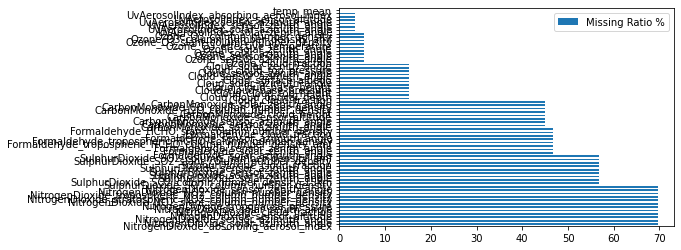

In [32]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(train)

In [33]:
train.isna().sum().sort_values(ascending =False).head(20)/len(train)

NitrogenDioxide_solar_zenith_angle                         0.697168
NitrogenDioxide_cloud_fraction                             0.697168
NitrogenDioxide_tropopause_pressure                        0.697168
NitrogenDioxide_NO2_slant_column_number_density            0.697168
NitrogenDioxide_stratospheric_NO2_column_number_density    0.697168
NitrogenDioxide_tropospheric_NO2_column_number_density     0.697168
NitrogenDioxide_NO2_column_number_density                  0.697168
NitrogenDioxide_sensor_altitude                            0.697168
NitrogenDioxide_sensor_azimuth_angle                       0.697168
NitrogenDioxide_sensor_zenith_angle                        0.697168
NitrogenDioxide_solar_azimuth_angle                        0.697168
NitrogenDioxide_absorbing_aerosol_index                    0.697168
SulphurDioxide_solar_zenith_angle                          0.567570
SulphurDioxide_SO2_column_number_density_15km              0.567570
SulphurDioxide_solar_azimuth_angle              

In [34]:
ls =['NitrogenDioxide_solar_zenith_angle', 'NitrogenDioxide_cloud_fraction', 'NitrogenDioxide_tropopause_pressure', 'NitrogenDioxide_NO2_slant_column_number_density', 'NitrogenDioxide_stratospheric_NO2_column_number_density', 'NitrogenDioxide_tropospheric_NO2_column_number_density','NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_sensor_altitude','NitrogenDioxide_sensor_azimuth_angle','NitrogenDioxide_sensor_zenith_angle', 'NitrogenDioxide_solar_azimuth_angle', 'NitrogenDioxide_absorbing_aerosol_index']
for i in ls:
  train.drop(labels=i, axis=1, inplace = True)
  test.drop(labels=i, axis=1, inplace = True)

In [35]:
'''import random
missing_values = train.columns[train.isna().any()].to_list()
for each in missing_values:
    if (train[each].dtypes =='float64'):
        minimum= int(train[each].quantile(0.25))
        maximum= int(train[each].quantile(0.75))
        A=train[train[each].isnull()].index.tolist()
        for i in A:
            train.loc[i,each]=random.randint(minimum,maximum)
        train[each]=pd.to_numeric(train[each])
   

    elif(train[each].dtypes == 'object'):
        if ('True' in str(train[each].str.contains('No').unique().tolist())):
            train[each].fillna('No',inplace=True)
        elif('True' in str(train[each].str.contains('None').unique().tolist())):
            train[each].fillna('None',inplace=True)
        elif('True' in str(train[each].str.contains('Unf').unique().tolist())):
            train[each].fillna('Unf',inplace=True)
        else:
            A=train[train[each].isnull()].index.tolist()
            unique = train[each].unique().tolist()
            unique=pd.Series(unique).dropna().tolist()
            for i in A:
                train.loc[i,each]=random.choice(unique)


missing_values = test.columns[test.isna().any()].to_list()
for each in missing_values:
    if (test[each].dtypes =='float64'):
        minimum= int(test[each].quantile(0.25))
        maximum= int(test[each].quantile(0.75))
        A=test[test[each].isnull()].index.tolist()
        for i in A:
            test.loc[i,each]=random.randint(minimum,maximum)
        test[each]=pd.to_numeric(test[each])
   

    elif(test[each].dtypes == 'object'):
        if ('True' in str(test[each].str.contains('No').unique().tolist())):
            test[each].fillna('No',inplace=True)
        elif('True' in str(test[each].str.contains('None').unique().tolist())):
            test[each].fillna('None',inplace=True)
        elif('True' in str(test[each].str.contains('Unf').unique().tolist())):
            test[each].fillna('Unf',inplace=True)
        else:
            A=test[test[each].isnull()].index.tolist()
            unique = test[each].unique().tolist()
            unique=pd.Series(unique).dropna().tolist()
            for i in A:
                test.loc[i,each]=random.choice(unique)
                '''

"import random\nmissing_values = train.columns[train.isna().any()].to_list()\nfor each in missing_values:\n    if (train[each].dtypes =='float64'):\n        minimum= int(train[each].quantile(0.25))\n        maximum= int(train[each].quantile(0.75))\n        A=train[train[each].isnull()].index.tolist()\n        for i in A:\n            train.loc[i,each]=random.randint(minimum,maximum)\n        train[each]=pd.to_numeric(train[each])\n   \n\n    elif(train[each].dtypes == 'object'):\n        if ('True' in str(train[each].str.contains('No').unique().tolist())):\n            train[each].fillna('No',inplace=True)\n        elif('True' in str(train[each].str.contains('None').unique().tolist())):\n            train[each].fillna('None',inplace=True)\n        elif('True' in str(train[each].str.contains('Unf').unique().tolist())):\n            train[each].fillna('Unf',inplace=True)\n        else:\n            A=train[train[each].isnull()].index.tolist()\n            unique = train[each].unique().to

In [36]:
# Check for any missing values
train.isnull().sum()# Check for any missing values

device                                                         0
site_latitude                                                  0
site_longitude                                                 0
humidity                                                       0
temp_mean                                                     20
SulphurDioxide_SO2_column_number_density                    5632
SulphurDioxide_SO2_column_number_density_amf                5632
SulphurDioxide_SO2_slant_column_number_density              5632
SulphurDioxide_cloud_fraction                               5632
SulphurDioxide_sensor_azimuth_angle                         5632
SulphurDioxide_sensor_zenith_angle                          5632
SulphurDioxide_solar_azimuth_angle                          5632
SulphurDioxide_solar_zenith_angle                           5632
SulphurDioxide_SO2_column_number_density_15km               5632
CarbonMonoxide_CO_column_number_density                     4460
CarbonMonoxide_H2O_column

In [37]:
#%pip install dataprep

In [38]:
#create_report(train).show()

In [39]:
corr_train = train.corr()
corr_train.head(15)

,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5,year,month,day
device,1.000000,-0.012168,-0.019546,0.051275,0.056208,-0.002937,0.047145,0.006261,0.016961,-0.006163,...,-0.008666,0.012648,0.004381,0.004055,0.101104,-0.012942,-0.068837,0.102124,-0.050120,-0.005300
site_latitude,-0.012168,1.000000,0.983852,-0.060079,0.211806,0.011416,-0.129535,0.008990,0.004280,-0.010412,...,-0.007353,-0.038008,-0.004680,0.002208,-0.058302,-0.014329,0.010511,0.125152,-0.001221,-0.001777
site_longitude,-0.019546,0.983852,1.000000,-0.042254,0.248958,0.007557,-0.151891,0.007132,-0.030976,-0.015215,...,-0.010619,-0.085025,-0.005918,0.004580,-0.060210,-0.016836,-0.037887,0.111930,-0.005284,-0.001377
humidity,0.051275,-0.060079,-0.042254,1.000000,0.640713,-0.045796,0.173585,-0.042739,0.124361,-0.016309,...,0.167880,0.162863,0.005105,0.017593,-0.145806,-0.062597,-0.274381,-0.227950,0.117276,-0.008423
temp_mean,0.056208,0.211806,0.248958,0.640713,1.000000,0.015747,-0.131923,0.015909,-0.022228,0.023187,...,-0.023537,-0.046161,0.004700,0.002056,-0.198523,-0.129440,-0.176744,0.031634,-0.146957,0.018116
SulphurDioxide_SO2_column_number_density,-0.002937,0.011416,0.007557,-0.045796,0.015747,1.000000,-0.102081,0.957376,-0.019838,-0.007512,...,-0.035097,0.005632,0.005085,0.158392,-0.022535,0.016940,0.034735,0.055243,-0.056370,0.021298
SulphurDioxide_SO2_column_number_density_amf,0.047145,-0.129535,-0.151891,0.173585,-0.131923,-0.102081,1.000000,-0.075770,0.114500,-0.008433,...,0.135556,0.297890,0.005381,-0.037214,0.222085,0.065930,-0.193674,-0.139514,0.235462,-0.089409
SulphurDioxide_SO2_slant_column_number_density,0.006261,0.008990,0.007132,-0.042739,0.015909,0.957376,-0.075770,1.000000,-0.032563,0.003032,...,-0.040696,0.002228,0.015053,0.144243,-0.007472,0.004026,0.024664,0.061689,-0.053518,0.008300
SulphurDioxide_cloud_fraction,0.016961,0.004280,-0.030976,0.124361,-0.022228,-0.019838,0.114500,-0.032563,1.000000,-0.188676,...,0.415183,0.414928,-0.062497,0.148292,0.002382,0.030313,-0.056190,0.034613,-0.033083,-0.023503
SulphurDioxide_sensor_azimuth_angle,-0.006163,-0.010412,-0.015215,-0.016309,0.023187,-0.007512,-0.008433,0.003032,-0.188676,1.000000,...,-0.217441,-0.290395,1.000000,0.049120,0.040713,-0.675013,0.062166,-0.035294,0.017263,0.111094


In [40]:
train

,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5,year,month,day
0,5,0.353465,32.560322,0.846844,22.038542,-0.000138,1.042629,-0.000143,0.291358,76.594910,...,7.799846,0.278111,76.618553,9.970293,-93.110069,19.214193,63.853333,2020,3,18
1,2,0.390741,32.582257,0.874493,21.545833,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,32.507083,2019,10,13
2,0,0.285751,32.578325,0.729340,23.568655,NaN,NaN,NaN,NaN,NaN,...,62.496590,0.416631,-97.300758,63.690605,-127.856804,40.857922,80.290833,2019,12,21
3,16,-1.244985,29.989236,0.919271,16.338542,-0.000111,0.750228,-0.000083,0.000000,75.789885,...,NaN,NaN,NaN,NaN,NaN,NaN,42.601687,2020,2,20
4,16,-1.244985,29.989236,0.858365,16.602083,-0.000127,0.792634,-0.000101,0.087338,74.787279,...,4.971117,0.277157,74.786025,32.583070,-57.273638,21.864529,89.642229,2019,4,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9918,7,0.306666,32.608550,0.736872,22.965972,NaN,NaN,NaN,NaN,NaN,...,3.419584,0.235853,72.847686,50.858546,-31.908548,24.023105,69.690417,2020,7,20
9919,27,0.307780,32.651449,0.721721,26.555392,-0.000684,0.414260,-0.000283,0.249911,-97.272911,...,10.198909,0.284046,-97.272919,64.089607,-109.482361,32.003708,47.470518,2020,2,23
9920,3,0.343898,32.587226,0.810413,22.915625,NaN,NaN,NaN,NaN,NaN,...,5.724823,0.299491,-98.203743,53.532288,-70.173080,32.261959,43.237917,2020,4,17
9921,32,0.357987,32.584100,0.876437,21.258333,NaN,NaN,NaN,NaN,NaN,...,49.711514,0.279414,71.634727,61.877548,-26.566027,25.409733,25.599925,2020,6,8


In [41]:
train.columns

Index(['device', 'site_latitude', 'site_longitude', 'humidity', 'temp_mean',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'Formaldehyde_tropospheric_HCHO_column_number_density',
       'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
       '

In [42]:
ls=['SulphurDioxide_SO2_column_number_density', 'SulphurDioxide_SO2_slant_column_number_density',
       'CarbonMonoxide_CO_column_number_density', 'CarbonMonoxide_H2O_column_number_density',
       'Ozone_O3_column_number_density', 'Ozone_O3_slant_column_number_density']
train['column_number'] = 0
test['column_number'] = 0
for i in ls:
    train['column_number'] += train[i]
    test['column_number'] += test[i]



train['column_number_mean'] = train[ls].values.mean(axis=1)
train['column_number_min'] = train[ls].values.min(axis=1)
train['column_number_max'] = train[ls].values.max(axis=1)

test['column_number_mean'] = test[ls].values.mean(axis=1)
test['column_number_min'] = test[ls].values.min(axis=1)
test['column_number_max'] = test[ls].values.max(axis=1)

In [43]:
ls=['SulphurDioxide_SO2_column_number_density_amf', 'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
       'Ozone_O3_column_number_density_amf']
train['density_amf'] = 0
test['density_amf'] = 0
for i in ls:
    train['density_amf'] += train[i]
    test['density_amf'] += test[i]



train['density_amf_mean'] = train[ls].values.mean(axis=1)
train['density_amf_min'] = train[ls].values.min(axis=1)
train['density_amf_max'] = train[ls].values.max(axis=1)

test['density_amf_mean'] = test[ls].values.mean(axis=1)
test['density_amf_min'] = test[ls].values.min(axis=1)
test['density_amf_max'] = test[ls].values.max(axis=1)

In [44]:
ls=['SulphurDioxide_cloud_fraction', 'Formaldehyde_cloud_fraction',
       'Ozone_cloud_fraction', 'Cloud_cloud_fraction']
train['cloud_fraction'] = 0
test['cloud_fraction'] = 0
for i in ls:
    train['cloud_fraction'] += train[i]
    test['cloud_fraction'] += test[i]



train['cloud_fraction_mean'] = train[ls].values.mean(axis=1)
train['cloud_fraction_min'] = train[ls].values.min(axis=1)
train['cloud_fraction_max'] = train[ls].values.max(axis=1)

test['cloud_fraction_mean'] = test[ls].values.mean(axis=1)
test['cloud_fraction_min'] = test[ls].values.min(axis=1)
test['cloud_fraction_max'] = test[ls].values.max(axis=1)

In [45]:
ls=['SulphurDioxide_sensor_azimuth_angle', 'CarbonMonoxide_sensor_azimuth_angle',
       'Formaldehyde_sensor_azimuth_angle', 'UvAerosolIndex_sensor_azimuth_angle',
       'Ozone_sensor_azimuth_angle', 'Cloud_sensor_azimuth_angle']
train['sensor_azimuth_angle'] = 0
test['sensor_azimuth_angle'] = 0
for i in ls:
    train['sensor_azimuth_angle'] += train[i]
    test['sensor_azimuth_angle'] += test[i]



train['sensor_azimuth_angle_mean'] = train[ls].values.mean(axis=1)
train['sensor_azimuth_angle_min'] = train[ls].values.min(axis=1)
train['sensor_azimuth_angle_max'] = train[ls].values.max(axis=1)

test['sensor_azimuth_angle_mean'] = test[ls].values.mean(axis=1)
test['sensor_azimuth_angle_min'] = test[ls].values.min(axis=1)
test['sensor_azimuth_angle_max'] = test[ls].values.max(axis=1)

In [46]:
ls=['SulphurDioxide_sensor_zenith_angle', 'CarbonMonoxide_sensor_zenith_angle',
       'Formaldehyde_sensor_zenith_angle', 'UvAerosolIndex_sensor_zenith_angle',
       'Ozone_sensor_zenith_angle', 'Cloud_sensor_zenith_angle']
train['sensor_zenith_angle'] = 0
test['sensor_zenith_angle'] = 0
for i in ls:
    train['sensor_zenith_angle'] += train[i]
    test['sensor_zenith_angle'] += test[i]



train['sensor_zenith_angle_mean'] = train[ls].values.mean(axis=1)
train['sensor_zenith_angle_min'] = train[ls].values.min(axis=1)
train['sensor_zenith_angle_max'] = train[ls].values.max(axis=1)

test['sensor_zenith_angle_mean'] = test[ls].values.mean(axis=1)
test['sensor_zenith_angle_min'] = test[ls].values.min(axis=1)
test['sensor_zenith_angle_max'] = test[ls].values.max(axis=1)

In [47]:
ls=['SulphurDioxide_solar_azimuth_angle', 'CarbonMonoxide_solar_azimuth_angle',
       'Formaldehyde_solar_azimuth_angle', 'UvAerosolIndex_solar_azimuth_angle',
       'Ozone_solar_azimuth_angle', 'Cloud_solar_azimuth_angle']
train['solar_azimuth_angle'] = 0
test['solar_azimuth_angle'] = 0
for i in ls:
    train['solar_azimuth_angle'] += train[i]
    test['solar_azimuth_angle'] += test[i]



train['solar_azimuth_angle_mean'] = train[ls].values.mean(axis=1)
train['solar_azimuth_angle_min'] = train[ls].values.min(axis=1)
train['solar_azimuth_angle_max'] = train[ls].values.max(axis=1)

test['solar_azimuth_angle_mean'] = test[ls].values.mean(axis=1)
test['solar_azimuth_angle_min'] = test[ls].values.min(axis=1)
test['solar_azimuth_angle_max'] = test[ls].values.max(axis=1)

In [48]:
ls=['SulphurDioxide_solar_zenith_angle', 'CarbonMonoxide_solar_zenith_angle',
       'Formaldehyde_solar_zenith_angle', 'UvAerosolIndex_solar_zenith_angle',
       'Ozone_solar_zenith_angle', 'Cloud_solar_zenith_angle']
train['solar_zenith_angle'] = 0
test['solar_zenith_angle'] = 0
for i in ls:
    train['solar_zenith_angle'] += train[i]
    test['solar_zenith_angle'] += test[i]



train['solar_zenith_angle_mean'] = train[ls].values.mean(axis=1)
train['solar_zenith_angle_min'] = train[ls].values.min(axis=1)
train['solar_zenith_angle_max'] = train[ls].values.max(axis=1)

test['solar_zenith_angle_mean'] = test[ls].values.mean(axis=1)
test['solar_zenith_angle_min'] = test[ls].values.min(axis=1)
test['solar_zenith_angle_max'] = test[ls].values.max(axis=1)

In [49]:
ls=['SulphurDioxide_SO2_slant_column_number_density', 'Formaldehyde_HCHO_slant_column_number_density',
       'Ozone_O3_slant_column_number_density']
train['slant_column_number'] = 0
test['slant_column_number'] = 0
for i in ls:
    train['slant_column_number'] += train[i]
    test['slant_column_number'] += test[i]



train['slant_column_number_mean'] = train[ls].values.mean(axis=1)
train['slant_column_number_min'] = train[ls].values.min(axis=1)
train['slant_column_number_max'] = train[ls].values.max(axis=1)

test['slant_column_number_mean'] = test[ls].values.mean(axis=1)
test['slant_column_number_min'] = test[ls].values.min(axis=1)
test['slant_column_number_max'] = test[ls].values.max(axis=1)

In [50]:
train.apply(lambda x: x.fillna(x.mean()),axis=0)

,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,solar_azimuth_angle_min,solar_azimuth_angle_max,solar_zenith_angle,solar_zenith_angle_mean,solar_zenith_angle_min,solar_zenith_angle_max,slant_column_number,slant_column_number_mean,slant_column_number_min,slant_column_number_max
0,5,0.353465,32.560322,0.846844,22.038542,-0.000138,1.042629,-0.000143,0.291358,76.594910,...,-93.110069,-93.008011,115.188055,19.198009,19.181372,19.214193,0.247479,0.082493,-0.000143,0.247530
1,2,0.390741,32.582257,0.874493,21.545833,0.000025,0.791470,0.000014,0.146898,-17.585282,...,-85.314009,-85.260595,170.054941,28.342490,28.330456,28.360367,0.299407,0.099802,-0.000047,0.299309
2,0,0.285751,32.578325,0.729340,23.568655,0.000025,0.791470,0.000014,0.146898,-17.585282,...,-85.314009,-85.260595,170.054941,28.342490,28.330456,28.360367,0.299407,0.099802,-0.000047,0.299309
3,16,-1.244985,29.989236,0.919271,16.338542,-0.000111,0.750228,-0.000083,0.000000,75.789885,...,-85.314009,-85.260595,170.054941,28.342490,28.330456,28.360367,0.249945,0.083315,-0.000083,0.250071
4,16,-1.244985,29.989236,0.858365,16.602083,-0.000127,0.792634,-0.000101,0.087338,74.787279,...,-57.277913,-57.234035,131.222290,21.870382,21.864529,21.894051,0.290106,0.096702,-0.000101,0.290234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9918,7,0.306666,32.608550,0.736872,22.965972,0.000025,0.791470,0.000014,0.146898,-17.585282,...,-85.314009,-85.260595,170.054941,28.342490,28.330456,28.360367,0.299407,0.099802,-0.000047,0.299309
9919,27,0.307780,32.651449,0.721721,26.555392,-0.000684,0.414260,-0.000283,0.249911,-97.272911,...,-85.314009,-85.260595,170.054941,28.342490,28.330456,28.360367,0.386802,0.128934,-0.000283,0.387010
9920,3,0.343898,32.587226,0.810413,22.915625,0.000025,0.791470,0.000014,0.146898,-17.585282,...,-85.314009,-85.260595,170.054941,28.342490,28.330456,28.360367,0.299407,0.099802,-0.000047,0.299309
9921,32,0.357987,32.584100,0.876437,21.258333,0.000025,0.791470,0.000014,0.146898,-17.585282,...,-85.314009,-85.260595,170.054941,28.342490,28.330456,28.360367,0.299407,0.099802,-0.000047,0.299309


In [51]:
test.apply(lambda x: x.fillna(x.mean()),axis=0)

,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,solar_azimuth_angle_min,solar_azimuth_angle_max,solar_zenith_angle,solar_zenith_angle_mean,solar_zenith_angle_min,solar_zenith_angle_max,slant_column_number,slant_column_number_mean,slant_column_number_min,slant_column_number_max
0,17,0.289040,32.589580,0.756840,23.849653,0.000124,0.839054,0.000104,0.063487,74.430419,...,-101.600266,-101.546713,126.034590,21.005765,21.000196,21.007084,0.286691,0.095564,-0.000019,0.286605
1,23,0.356400,32.573000,0.810854,22.075347,0.000024,0.786688,0.000014,0.160708,-3.778465,...,-110.757412,-110.706350,168.970723,28.161787,28.147113,28.181973,0.317661,0.105887,-0.000047,0.317535
2,26,0.381576,32.647109,0.883253,20.050694,0.000024,0.786688,0.000014,0.160708,-3.778465,...,-110.757412,-110.706350,168.970723,28.161787,28.147113,28.181973,0.317661,0.105887,-0.000047,0.317535
3,9,0.379562,32.553714,0.782583,22.248958,0.000176,0.730853,0.000129,0.085770,75.361610,...,-72.224319,-72.216972,124.042103,20.673684,20.665833,20.675266,0.266728,0.088909,0.000129,0.266415
4,18,0.344000,32.553000,0.770116,22.565217,0.000024,0.786688,0.000014,0.160708,-3.778465,...,-110.757412,-110.706350,168.970723,28.161787,28.147113,28.181973,0.317661,0.105887,-0.000047,0.317535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,32,0.357987,32.584100,0.786575,23.790833,0.000024,0.786688,0.000014,0.160708,-3.778465,...,-110.757412,-110.706350,168.970723,28.161787,28.147113,28.181973,0.317661,0.105887,-0.000047,0.317535
4250,2,0.390741,32.582257,0.828441,21.801389,0.000024,0.786688,0.000014,0.160708,-3.778465,...,-110.757412,-110.706350,168.970723,28.161787,28.147113,28.181973,0.317661,0.105887,-0.000047,0.317535
4251,2,0.390741,32.582257,0.859490,21.851042,0.000024,0.786688,0.000014,0.160708,-3.778465,...,-110.757412,-110.706350,168.970723,28.161787,28.147113,28.181973,0.317661,0.105887,-0.000047,0.317535
4252,28,0.373078,32.628226,0.833803,21.948864,0.000024,0.786688,0.000014,0.160708,-3.778465,...,-110.757412,-110.706350,168.970723,28.161787,28.147113,28.181973,0.317661,0.105887,-0.000047,0.317535


In [52]:
ls = ['device', 'site_latitude', 'site_longitude', 'humidity', 'temp_mean',
       'year', 'month', 'day', 'column_number', 'column_number_mean',
       'column_number_min', 'column_number_max', 'density_amf',
       'density_amf_mean', 'density_amf_min', 'density_amf_max',
       'cloud_fraction', 'cloud_fraction_mean', 'cloud_fraction_min',
       'cloud_fraction_max', 'sensor_azimuth_angle',
       'sensor_azimuth_angle_mean', 'sensor_azimuth_angle_min',
       'sensor_azimuth_angle_max', 'sensor_zenith_angle',
       'sensor_zenith_angle_mean', 'sensor_zenith_angle_min',
       'sensor_zenith_angle_max', 'solar_azimuth_angle',
       'solar_azimuth_angle_mean', 'solar_azimuth_angle_min',
       'solar_azimuth_angle_max', 'solar_zenith_angle',
       'solar_zenith_angle_mean', 'solar_zenith_angle_min',
       'solar_zenith_angle_max', 'slant_column_number',
       'slant_column_number_mean', 'slant_column_number_min',
       'slant_column_number_max','pm2_5']

# ***Traiiiiiin***

In [53]:
 #splitting data into X_train, X_test, y_train, y_test
training_data = train
X = training_data.drop(['pm2_5'], axis = 1)
y = training_data['pm2_5']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7938, 91) (1985, 91)
(7938,) (1985,)


In [54]:
import lightgbm as lgb
# Light Gradient Boosting Regressor
lightgbm = lgb.LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)
lightgbm.fit(X_train, y_train)

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, bagging_seed=8,
              feature_fraction=0.2, feature_fraction_seed=8, learning_rate=0.01,
              max_bin=200, min_sum_hessian_in_leaf=11, n_estimators=7000,
              num_leaves=6, objective='regression', random_state=42,
              verbose=-1)

In [55]:
pred_train_model= lightgbm.predict(X_train)
print(mean_absolute_error(y_train,pred_train_model))

pred_test_model= lightgbm.predict(X_test)
print(mean_absolute_error(y_test,pred_test_model))

7.546549081924817
8.664885255777945


In [56]:
pre_lgbm = lightgbm.predict(test)
sub_lgbm = pd.DataFrame()
sub_lgbm['pm2_5'] = submission.ID
sub_lgbm['target'] = pre_lgbm
sub_lgbm.to_csv('sub_lgbm_light.csv', index=False)

In [57]:
from sklearn.metrics import mean_absolute_percentage_error

model = xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

# Fitting the model
model.fit(X_train, y_train)  #fit the model
pred_train_model= model.predict(X_train)
print(mean_absolute_error(y_train,pred_train_model))

pred_test_model= model.predict(X_test)
print(mean_absolute_error(y_test,pred_test_model))

2.1763431876589974
8.157882987136409


In [58]:
predictions = model.predict(test)

In [59]:
submission

,ID,pm2_5
0,ID_UOH62J0XHX,0
1,ID_4OPWSB0UHJ,0
2,ID_3SLMNNG1Z3,0
3,ID_MFUHTXYPM4,0
4,ID_TY1DAND8ZP,0
...,...,...
4249,ID_NYKGOYFBKZ,0
4250,ID_IWO4EVLHSQ,0
4251,ID_G1M1IMY9WU,0
4252,ID_DXV65Q1QXI,0


In [60]:
submission.pm2_5 = predictions

In [61]:
submission

,ID,pm2_5
0,ID_UOH62J0XHX,36.293285
1,ID_4OPWSB0UHJ,117.425491
2,ID_3SLMNNG1Z3,89.585190
3,ID_MFUHTXYPM4,78.301949
4,ID_TY1DAND8ZP,86.825005
...,...,...
4249,ID_NYKGOYFBKZ,53.147812
4250,ID_IWO4EVLHSQ,83.566345
4251,ID_G1M1IMY9WU,63.084942
4252,ID_DXV65Q1QXI,61.423458


In [62]:
# submission.to_csv('layer_ai_1.csv',index=False)

In [63]:
sub = pd.DataFrame()
sub['ID'] = submission['ID']
sub['pm2_5'] = (pre_lgbm + predictions)/2
sub.to_csv('sub_ensemble.csv', index=False)

In [64]:
from IPython.display import FileLink
def create_submission(submission_file, submission_name):
    submission_file.to_csv(submission_name+".csv",index=False)
    return FileLink(submission_name+".csv")
create_submission(sub, "sol")

/kaggle/working/sol.csv